In [3]:
# set path
rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = '/Users/rj/Fellow-CERN/SAD/ATF2/ultralow/tuning/'

os.chdir(workdir)
import scipy;
from scipy.integrate import quad, dblquad
import ipywidgets

from matplotlib.ticker import AutoMinorLocator
import os
import glob

import scipy.optimize

In [3]:
nseed = 100
nknob = 48

In [4]:
if 1 in [1,3]:
    pass
else:
    print(3)

In [17]:
#10bx1by
# w/o SKBBA
sigx = np.zeros((nknob, nseed));
sigy = np.zeros((nknob, nseed));
badseed = [21, 22, 89, 90]
for i in range(nseed):
    if i in badseed:
        pass
    else:    
        fn = './htcondor/output/res_10bx1by_wo_SKBBA_'+str(i+1)+'.dat' 
        dat0 = genfromtxt(fn, comments='#', dtype= 'U11, <f8, <f8')
        knob2 = [];
        for j in range(len(dat0)):
            knob2.append(dat0[j][0])            
            sigx[j,i] = dat0[j][1]
            sigy[j,i] = dat0[j][2]

sigx_norm_woSKBBA = sigx
sigy_norm_woSKBBA = sigy        
sigx2_norm_woSKBBA = []; sigy2_norm_woSKBBA = [];
for i in range(len(sigx)):
    sigx1 = RemoveMaxMin(sigx[i])
    sigy1 = RemoveMaxMin(sigy[i])
    sigx2_norm_woSKBBA.append([mean(sigx1), std(sigx1)])
    sigy2_norm_woSKBBA.append([mean(sigy1), std(sigy1)])    
        
# w/ SKBBA    
badseed = [21, 22, 89]
sigx = np.zeros((len(dat0), nseed));
sigy = np.zeros((len(dat0), nseed));
for i in range(nseed):
    if i in badseed:
        pass
    else:
        fn = './htcondor/output/res_10bx1by_w_SKBBA_'+str(i+1)+'.dat' 
        dat0 = genfromtxt(fn, comments='#', dtype= 'U11, <f8, <f8')
        knob2 = [];
        for j in range(len(dat0)):
            knob2.append(dat0[j][0])            
            sigx[j,i] = dat0[j][1]
            sigy[j,i] = dat0[j][2]

sigx_norm_wSKBBA = sigx
sigy_norm_wSKBBA = sigy
sigx2_norm_wSKBBA = []; sigy2_norm_wSKBBA = [];
for i in range(len(sigx)):
    sigx1 = RemoveMaxMin(sigx[i])
    sigy1 = RemoveMaxMin(sigy[i])
    sigx2_norm_wSKBBA.append([mean(sigx1), std(sigx1)])
    sigy2_norm_wSKBBA.append([mean(sigy1), std(sigy1)]) 
 
#########################################################
# 1bx1by
# w/o SKBBA
sigx = np.zeros((nknob, nseed));
sigy = np.zeros((nknob, nseed));
badseed = [1000]
for i in range(nseed):
    if i in badseed:
        pass
    else:    
        fn = './htcondor/output/res_1bx1by_wo_SKBBA_'+str(i+1)+'.dat' 
        dat0 = genfromtxt(fn, comments='#', dtype= 'U11, <f8, <f8')
        knob2 = [];
        for j in range(len(dat0)):
            knob2.append(dat0[j][0])            
            sigx[j,i] = dat0[j][1]
            sigy[j,i] = dat0[j][2]

sigx_norm_1bx_woSKBBA = sigx
sigy_norm_1bx_woSKBBA = sigy        
sigx2_norm_1bx_woSKBBA = []; sigy2_norm_1bx_woSKBBA = [];
for i in range(len(sigx)):
    sigx1 = RemoveMaxMin(sigx[i])
    sigy1 = RemoveMaxMin(sigy[i])
    sigx2_norm_1bx_woSKBBA.append([mean(sigx1), std(sigx1)])
    sigy2_norm_1bx_woSKBBA.append([mean(sigy1), std(sigy1)]) 
    
# w/ SKBBA    
badseed = [21, 22, 33, 34, 89, 90]
sigx = np.zeros((len(dat0), nseed));
sigy = np.zeros((len(dat0), nseed));
for i in range(nseed):
    if i in badseed:
        pass
    else:
        fn = './htcondor/output/res_1bx1by_w_SKBBA_'+str(i+1)+'.dat' 
        dat0 = genfromtxt(fn, comments='#', dtype= 'U11, <f8, <f8')
        knob2 = [];
        for j in range(len(dat0)):
            knob2.append(dat0[j][0])            
            sigx[j,i] = dat0[j][1]
            sigy[j,i] = dat0[j][2]

sigx_norm_1bx_wSKBBA = sigx
sigy_norm_1bx_wSKBBA = sigy
sigx2_norm_1bx_wSKBBA = []; sigy2_norm_1bx_wSKBBA = [];
for i in range(len(sigx)):
    sigx1 = RemoveMaxMin(sigx[i])
    sigy1 = RemoveMaxMin(sigy[i])
    sigx2_norm_1bx_wSKBBA.append([mean(sigx1), std(sigx1)])
    sigy2_norm_1bx_wSKBBA.append([mean(sigy1), std(sigy1)])  
    
####################    
# 5% probability sigy>100 nm after 
# reduction by non-linear knobs looks small ???

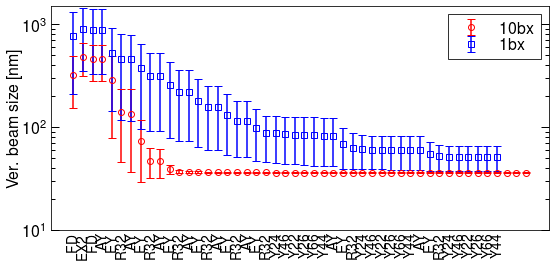

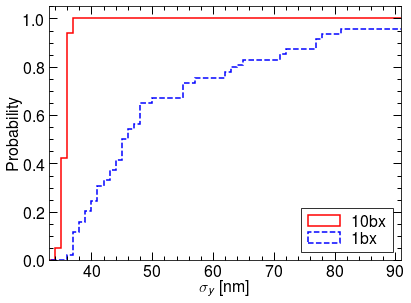

In [28]:
fig = plt.figure(figsize=(8, 4))
plt.errorbar(range(len(sigy2_norm_wSKBBA)), array(sigy2_norm_wSKBBA)[:,0]*1e9, yerr=array(sigy2_norm_wSKBBA)[:, 1]*1e9, fmt='ro', mfc='None', capsize=4, label='10bx')
plt.errorbar(range(len(sigy2_norm_1bx_wSKBBA)), array(sigy2_norm_1bx_wSKBBA)[:,0]*1e9, yerr=array(sigy2_norm_1bx_wSKBBA)[:, 1]*1e9, fmt='bs', mfc='None', capsize=4, label='1bx')
# plt.errorbar(range(len(sigy2_norm_woSKBBA)), array(sigy2_norm_woSKBBA)[:,0]*1e9, yerr=array(sigy2_norm_woSKBBA)[:, 1]*1e9, fmt='bs', mfc='None', capsize=4, label='w/o BBA')
plt.ylabel(r'Ver. beam size [nm]')
plt.xticks(range(len(knob2)), knob2, rotation=90, fontsize=14)
plt.tick_params(axis='x',which='both', top='off', bottom='off')
plt.yscale('log')
plt.ylim(10, 1500)
plt.legend(loc='best')

fig.tight_layout()
plt.show()
# fig.savefig('./figure/log_sigy_staticErr.pdf')

fig = plt.figure()
plt.hist(array(sigy_norm_wSKBBA[-1])*1e9, bins=68, range=(32, 100), label='10bx', cumulative=True, normed=True, histtype='step', lw=1.5)
plt.hist(array(sigy_norm_1bx_wSKBBA[-1])*1e9, bins=68, range=(32, 100), label='1bx', cumulative=True, normed=True, histtype='step',lw=1.5)
plt.xlabel(r'$\sigma_y$ [nm]')
plt.ylabel('Probability')
plt.xlim(33, 91)
plt.legend(loc='lower right')

fig.tight_layout()
plt.show()